In [1]:
import numpy as np
import matplotlib.pyplot as plt

1. Алгоритм сокращения размерности признакового пространства с помощью PCA.

In [7]:
def func(x):
    return 0.5 * x + 0.2 * x ** 2 - 0.05 * x ** 3 + 0.2 * np.sin(4 * x) - 3


coord_x = np.arange(-4.0, 6.0, 0.1)
coord_y = func(coord_x)
K = 10
X = np.array([[xx**i for i in range(K)] for xx in coord_x]) # обучающая выборка для поиска коэффициентов модели
Y = coord_y

X_train = X[::2]  # обучающая выборка (входы)
Y_train = Y[::2]  # обучающая выборка (целевые значения)


F = (X_train.T @ X_train)/len(X_train) # матрица Грамма
L, W = np.linalg.eig(F) # собственные числа и собственные векторы

WW = sorted(zip(L, W), key=lambda lx: lx[0], reverse=False) # сортировка собственных векторов по собственным числам
WW = np.array([w[1] for w in WW])

G = X @ WW.T # вычисление новых признаков
G = G[:, :7]

XX_train = G[::2]
w = np.linalg.inv(XX_train.T @ XX_train) @ XX_train.T @ Y_train

predict = G @ w

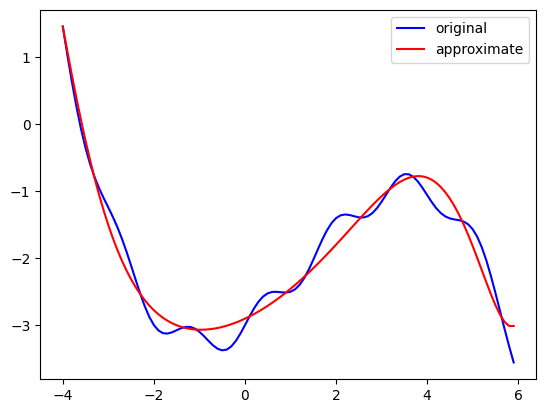

In [16]:
plt.plot(coord_x, coord_y, label='original', c='blue')
plt.plot(coord_x, [xx@w for xx in G], label='approximate', c='red')

plt.legend()

plt.show()

2. Сингулярное разложение матриц.

In [17]:
np.random.seed(0)

n_total = 1000 # число образов выборки
n_features = 200 # число признаков

table = np.zeros(shape=(n_total, n_features))

for _ in range(100): #  разреженная матрица 1000 на 200
    i, j = np.random.randint(0, n_total), np.random.randint(0, n_features)
    table[i, j] = np.random.randint(1, 10)


F = (table.T @ table)/len(table)
L, W = np.linalg.eig(F)
WW = W[np.argsort(-L)]

data_x = table @ WW.T[:, :(L > 0.01).sum()]